In [10]:
import sys
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
tutorial_path = pathlib.Path().resolve()
# Importing the main code.
module_path = os.path.abspath(os.path.join('..', 'src', 'ocloc'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ocloc import ProcessingParameters, ClockDrift
from ocloc import read_correlation_file

# Parameters for locating the files where the correlation files.
path2data_dir = "/Users/localadmin/Dropbox/GitHub/data"

# The reference time is the date of deployment or zero time. 
reference_time = '2014-08-21T00:00:00.000000Z'

# Station info is a file with the stations' metadata
station_file = '/Users/localadmin/Dropbox/GitHub/ocloc/tutorials/station_info'

# Now we describe the processing parameters that will be used for all correlations.
params2 = ProcessingParameters(
                 freqmin = 0.2, # Low freq. for the bandpass filter
                 freqmax = 0.4, # High freq. for the bandpass filter 
                 ref_vel = 4500, # m/s
                 dist_trh = 2.5, # Minimum station separation in terms of wavelength
                 snr_trh = 30, # Signal-to-noise ratio threshold
                 noise_st = 240, # start of the noise window.
                 dt_err = 0.004, # Sampling interval needs to be multiple of this value.
                 resp_details = False)

# We load everything into our main object that will handle all the operations.
cd = ClockDrift(station_file, path2data_dir, 
                  reference_time = '2014-08-21T00:00:00.000000Z',
                  list_of_processing_parameters=[params2])
cd.calculate_tapp_4_allcorrelations(days_apart=1)

No correlation file found for station:O26
Calculating the apriori estimates for each stationpair
Calculating the t_app for each stationpair.


# Removing stations that have cross-correlations that are not distributed over time.

Let's start plotting how well distributed are the cross-correlations with enough signal-to-noise ratio and enough interstation distance

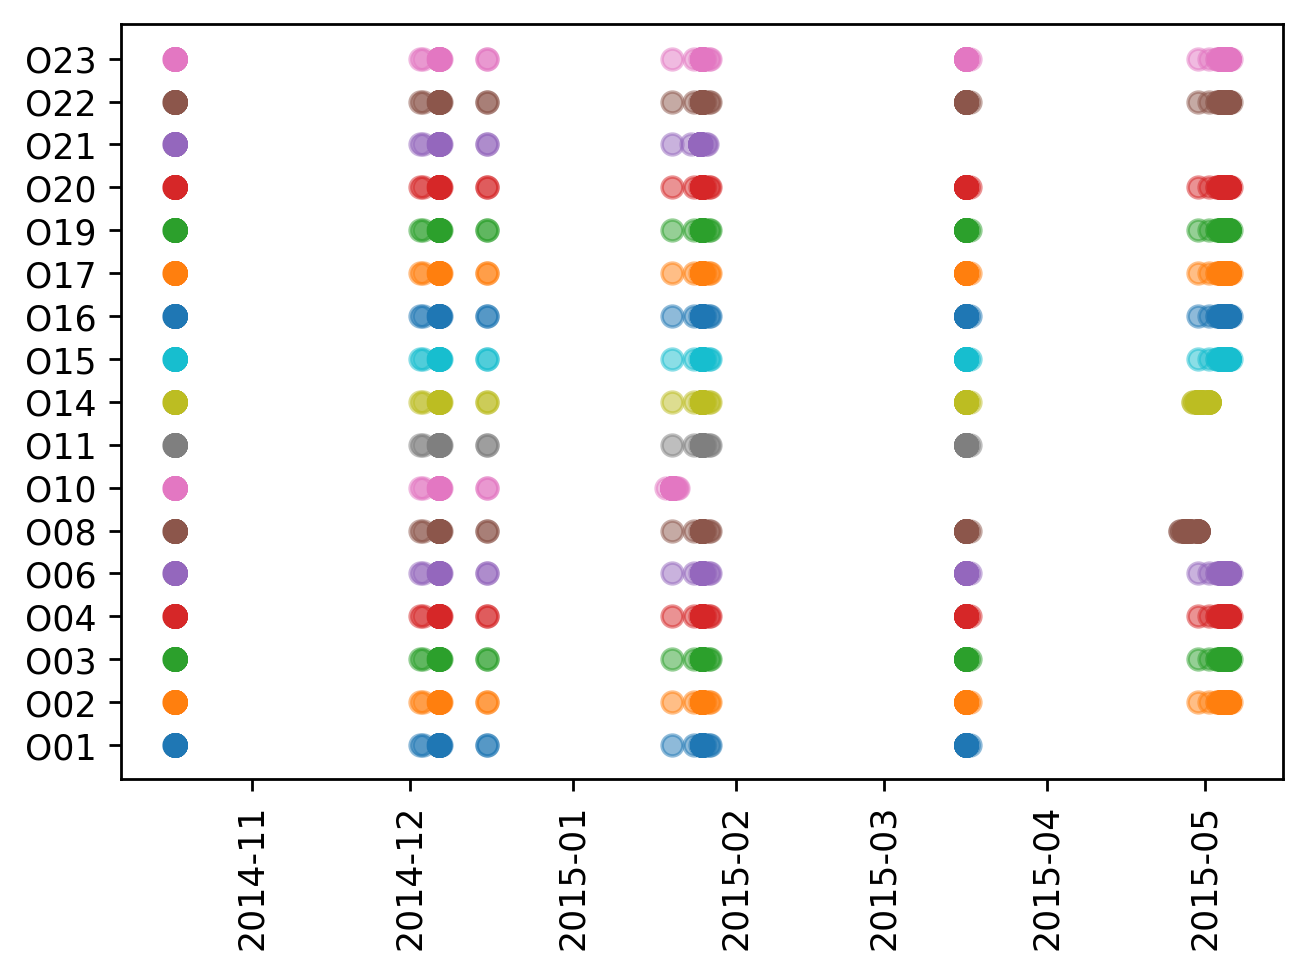

In [13]:
fig, ax = plt.subplots(1, 1, dpi=250)
y_labels = []
for i, station in enumerate(cd.stations):
    # Plot only stations that need correction.
    if not station.needs_correction:
        continue
    y_labels.append(station.code)
    
    # Get correlations of the station.
    correlations = cd.get_correlations_of_station(station.code)
    
    for c in correlations:
        if c.t_app[-1] is np.nan:
            continue
    # Get the average dates of the stations' cross-correlations.
    avg_dates = [corr.average_date for corr in correlations]
    
    y_axis = [i for x in range(len(avg_dates))] 
    plt.plot_date(avg_dates, y_axis, alpha=0.5)
plt.xticks(rotation=90)
ax.set_yticks(range(len(y_labels)))
ax.set_yticklabels(y_labels)
plt.show()

In [ ]:
cd.plot_inventory_correlations()

In [ ]:
avg_dates

In [ ]:
station
avg_dates = [corr.average_date for corr in correlations]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.plot_date(avg_dates, np.zeros(len(avg_dates)))